In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt

# ---------------------------
# 1. Load and Display the Data
# ---------------------------
# Read the CSV file (ensure it's in your Colab working directory)
data = pd.read_csv('103samples.csv')
print("First few rows of the data:")
print(data.head())




First few rows of the data:
   'Elapsed time'  'MLII'
0  'hh:mm:ss.mmm'    'mV'
1      '0:00.000'  -0.375
2      '0:00.003'  -0.375
3      '0:00.006'  -0.375
4      '0:00.008'  -0.375


In [29]:
data = data.iloc[1:].reset_index(drop=True)
print(data.head())

  'Elapsed time'  'MLII'
0     '0:00.000'  -0.375
1     '0:00.003'  -0.375
2     '0:00.006'  -0.375
3     '0:00.008'  -0.375
4     '0:00.011'  -0.375


In [30]:
old_name = data.columns[1]
data = data.rename(columns={old_name: "ECG"})

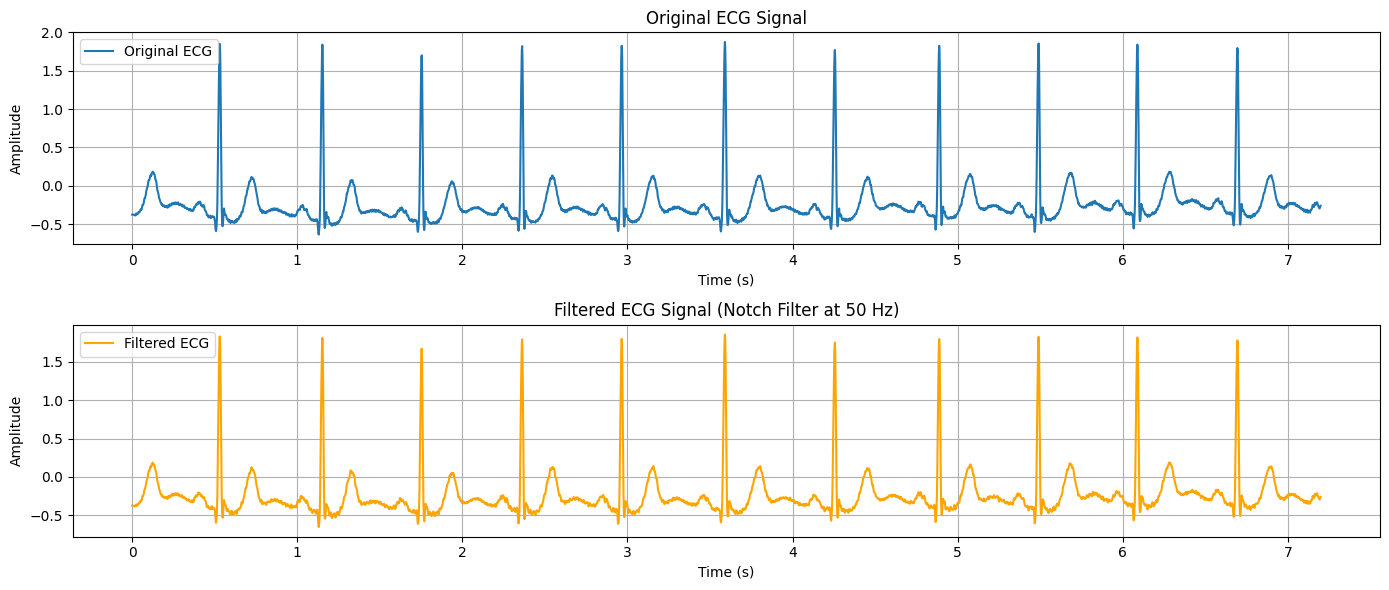

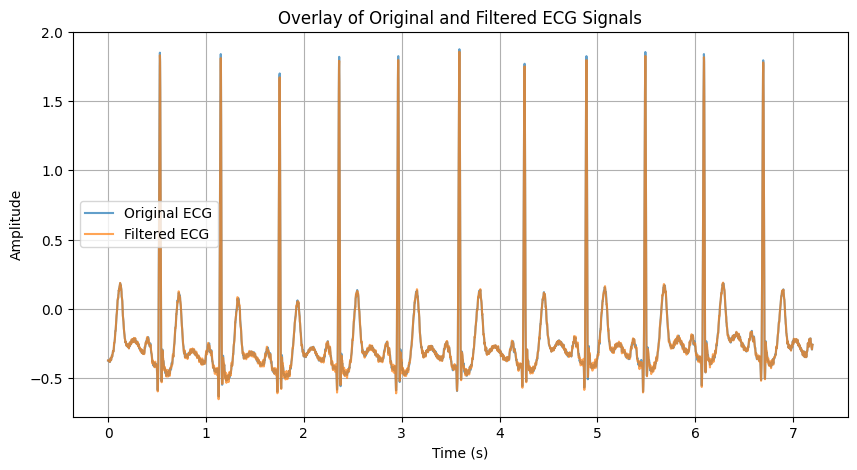

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt

# Convert the ECG column to numeric (adjust the column name if different)
data['ECG'] = pd.to_numeric(data['ECG'], errors='coerce')

# Check for any NaN values after conversion and drop them (or handle as needed)
if data['ECG'].isna().any():
    print("Warning: Found NaN values in ECG column. Dropping them.")
    data = data.dropna(subset=['ECG']).reset_index(drop=True)

ecg_signal = data['ECG'].values

# ---------------------------
# 2. Apply a Notch Filter to Remove 50/60 Hz Noise
# ---------------------------
fs = 500  # Sampling frequency in Hz (adjust based on your data)
f0 = 50   # Center frequency for the notch filter (change to 60 if needed)
Q = 30.0  # Quality factor; higher Q means a narrower notch

# Design the notch filter
b, a = iirnotch(f0, Q, fs)

# Apply the notch filter using zero-phase filtering to avoid phase shift
ecg_filtered = filtfilt(b, a, ecg_signal)

# ---------------------------
# 3. Plot Original and Filtered ECG Signals
# ---------------------------
# Create a time vector based on the sampling frequency
t = np.arange(len(ecg_signal)) / fs

plt.figure(figsize=(14, 6))

# Plot original ECG signal
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal, label='Original ECG')
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot filtered ECG signal
plt.subplot(2, 1, 2)
plt.plot(t, ecg_filtered, label='Filtered ECG', color='orange')
plt.title('Filtered ECG Signal (Notch Filter at {} Hz)'.format(f0))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, ecg_signal, label='Original ECG', alpha=0.7)
plt.plot(t, ecg_filtered, label='Filtered ECG', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlay of Original and Filtered ECG Signals')
plt.legend()
plt.grid(True)
plt.show()


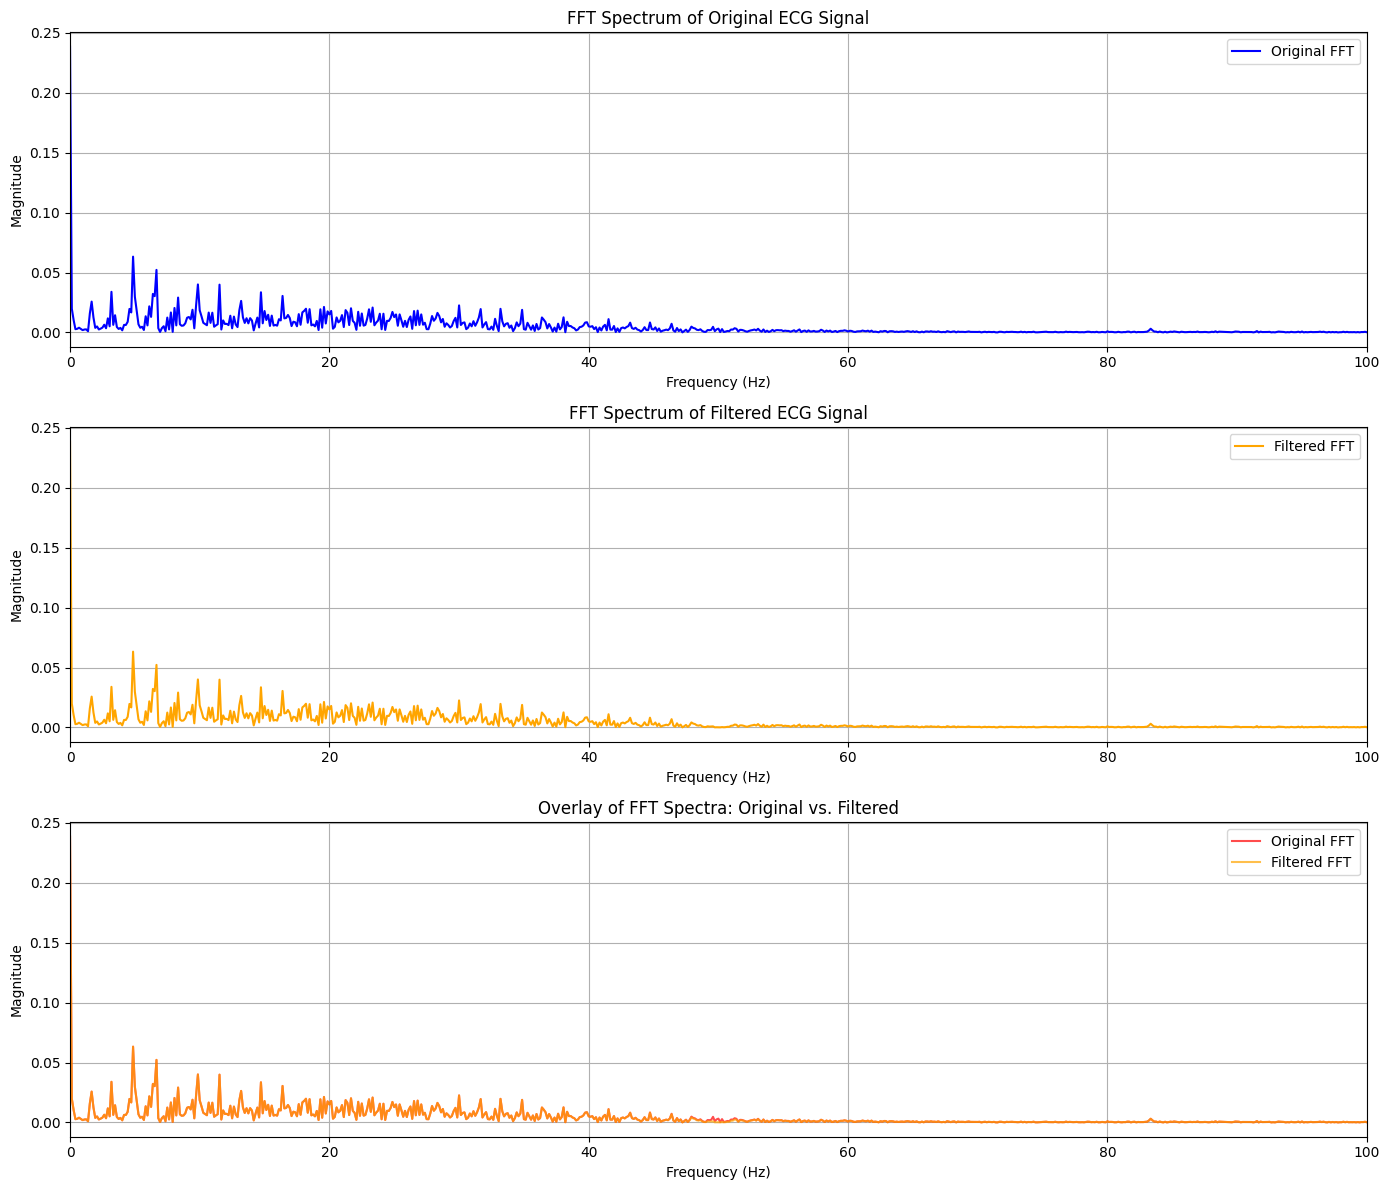

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(signal, fs):
    """Compute the FFT of a signal and return frequency and normalized magnitude."""
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/fs)
    fft_signal = np.fft.rfft(signal)
    magnitude = np.abs(fft_signal) / n
    return freq, magnitude

# Compute FFT for the original and filtered signals
freq_orig, magnitude_orig = compute_fft(ecg_signal, fs)
freq_filt, magnitude_filt = compute_fft(ecg_filtered, fs)

# ---------------------------
# Plot FFT Spectrum for Original Signal
# ---------------------------
plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
plt.plot(freq_orig, magnitude_orig, label='Original FFT', color='blue')
plt.title('FFT Spectrum of Original ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)  # Focus on 0-100 Hz where most ECG features lie
plt.grid(True)
plt.legend()

# ---------------------------
# Plot FFT Spectrum for Filtered Signal
# ---------------------------
plt.subplot(3, 1, 2)
plt.plot(freq_filt, magnitude_filt, label='Filtered FFT', color='orange')
plt.title('FFT Spectrum of Filtered ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)
plt.grid(True)
plt.legend()

# ---------------------------
# Plot Overlapping FFT Spectra
# ---------------------------
plt.subplot(3, 1, 3)
plt.plot(freq_orig, magnitude_orig, label='Original FFT', color='red', alpha=0.7)
plt.plot(freq_filt, magnitude_filt, label='Filtered FFT', color='orange', alpha=0.7)
plt.title('Overlay of FFT Spectra: Original vs. Filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


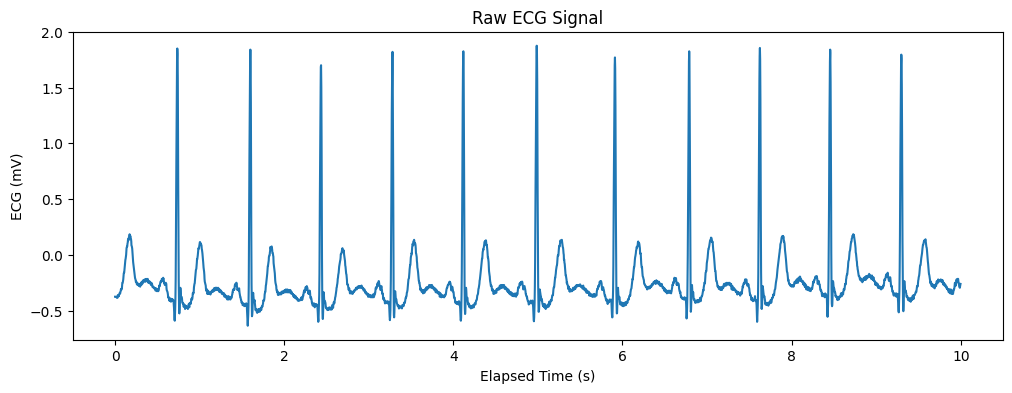

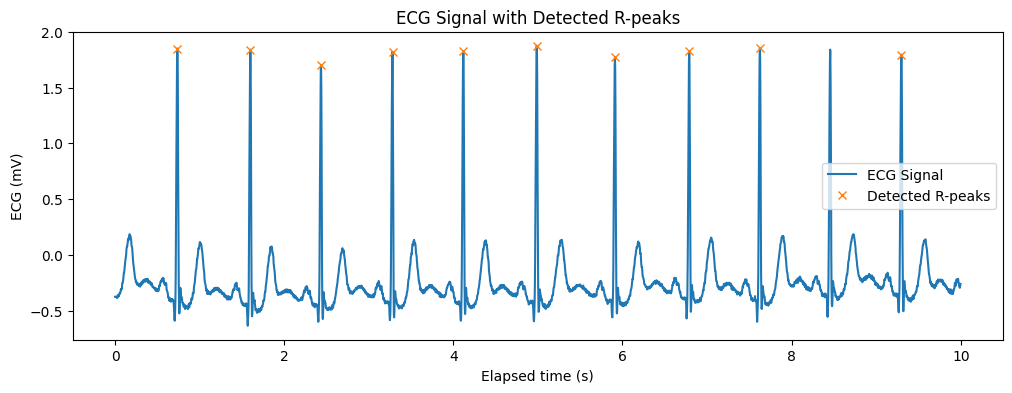

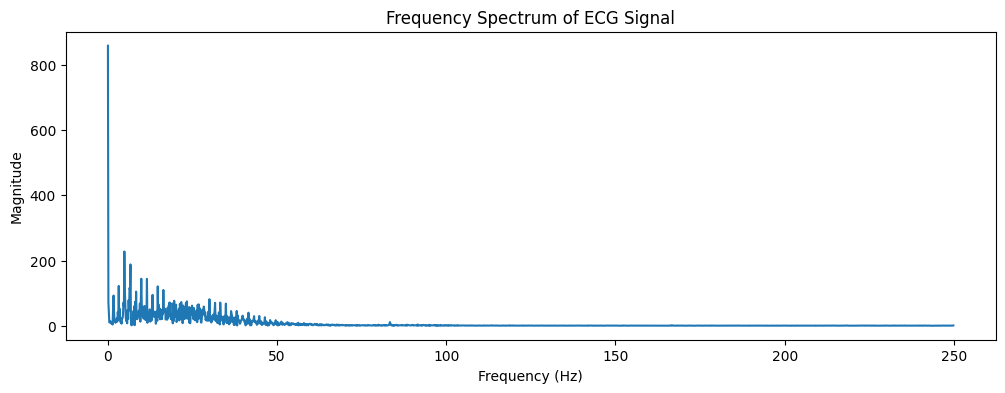

Average Heart Rate: 63.08 BPM


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load the data
data = pd.read_csv('103samples.csv')

# Clean ECG column (remove non-numeric rows)
data = data[pd.to_numeric(data["'MLII'"], errors='coerce').notnull()]
data["'MLII'"] = data["'MLII'"].astype(float)

# Convert 'Elapsed time' to seconds
# Step 1: Remove single quotes and whitespace
time_str = data["'Elapsed time'"].str.replace("'", "").str.strip()

# Step 2: Convert mm:ss.SSS format to seconds manually
time_parsed = pd.to_datetime(time_str, format="%M:%S.%f")
data['ElapsedSeconds'] = time_parsed.dt.minute * 60 + time_parsed.dt.second + time_parsed.dt.microsecond / 1e6

# Define sampling frequency
fs = 500

# Plot raw ECG signal
plt.figure(figsize=(12, 4))
plt.plot(data['ElapsedSeconds'], data["'MLII'"])
plt.title("Raw ECG Signal")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("ECG (mV)")
plt.show()

# Detect R-peaks
peaks, properties = signal.find_peaks(data["'MLII'"], distance=fs*0.6, height=0.5)

plt.figure(figsize=(12, 4))
plt.plot(data['ElapsedSeconds'], data["'MLII'"], label='ECG Signal')
plt.plot(data['ElapsedSeconds'].iloc[peaks], data["'MLII'"].iloc[peaks], "x", label='Detected R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Elapsed time (s)")
plt.ylabel("ECG (mV)")
plt.legend()
plt.show()

# Perform FFT on the ECG signal
ecg_signal = data["'MLII'"].values
n = len(ecg_signal)
f = np.fft.fftfreq(n, d=1/fs)
ecg_fft = np.fft.fft(ecg_signal)

plt.figure(figsize=(12, 4))
plt.plot(f[:n//2], np.abs(ecg_fft)[:n//2])
plt.title("Frequency Spectrum of ECG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Calculate RR intervals and average heart rate
rr_intervals = np.diff(data['ElapsedSeconds'].iloc[peaks])
average_rr = np.mean(rr_intervals)
heart_rate = 60 / average_rr  # Beats per minute (BPM)
print("Average Heart Rate: {:.2f} BPM".format(heart_rate))


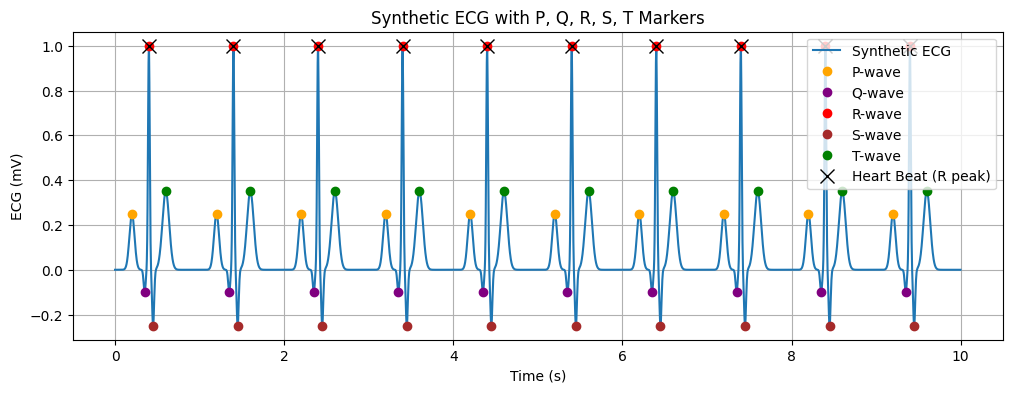

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 500               # Sampling frequency in Hz
beat_duration = 1.0    # Duration of one heartbeat in seconds (for simulation)
duration = 10          # Total duration in seconds
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Define a Gaussian function for modeling waves
def gaussian(t, mu, sigma, amplitude):
    return amplitude * np.exp(-((t - mu) ** 2) / (2 * sigma ** 2))

# Function to generate one synthetic ECG beat with P, Q, R, S, T waves
def generate_beat(t_beat):
    # Initialize beat waveform
    beat = np.zeros_like(t_beat)

    # Define wave parameters (mu in sec, sigma controls width, amplitude in mV)
    waves = {
        'P': {'mu': 0.2,  'sigma': 0.03,  'amplitude': 0.25},
        'Q': {'mu': 0.35, 'sigma': 0.012, 'amplitude': -0.1},
        'R': {'mu': 0.4,  'sigma': 0.01,  'amplitude': 1.0},
        'S': {'mu': 0.45, 'sigma': 0.012, 'amplitude': -0.25},
        'T': {'mu': 0.6,  'sigma': 0.04,  'amplitude': 0.35},
    }
    markers = {}  # To store the time of each wave peak (or trough)

    # Sum each wave's contribution
    for key, params in waves.items():
        wave = gaussian(t_beat, params['mu'], params['sigma'], params['amplitude'])
        beat += wave
        # For positive waves, mark the maximum; for negative, mark the minimum
        if params['amplitude'] >= 0:
            idx = np.argmax(wave)
        else:
            idx = np.argmin(wave)
        markers[key] = t_beat[idx]

    return beat, markers

# Number of beats in the total duration
n_beats = int(duration / beat_duration)

# Initialize overall ECG signal and dictionary to store global markers
ecg_signal = np.zeros_like(t)
wave_markers = {'P': [], 'Q': [], 'R': [], 'S': [], 'T': []}
beat_times = []  # Start time of each beat

# Generate beats and place them sequentially in the signal
for i in range(n_beats):
    beat_start_time = i * beat_duration
    beat_times.append(beat_start_time)
    # Create time vector for one beat
    t_beat = np.linspace(0, beat_duration, int(beat_duration * fs), endpoint=False)
    beat, markers = generate_beat(t_beat)
    # Determine the indices in the overall signal
    start_idx = i * int(beat_duration * fs)
    end_idx = start_idx + len(t_beat)
    ecg_signal[start_idx:end_idx] = beat
    # Convert local markers to global time and store them
    for wave in wave_markers:
        wave_markers[wave].append(beat_start_time + markers[wave])

# Plot the synthetic ECG signal with wave markers
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal, label='Synthetic ECG', color='C0')

# Define colors for each wave marker
colors = {'P': 'orange', 'Q': 'purple', 'R': 'red', 'S': 'brown', 'T': 'green'}

# Plot each wave marker as a point
for wave in wave_markers:
    global_times = wave_markers[wave]
    # Get corresponding ECG amplitude values using interpolation
    amplitudes = [np.interp(tm, t, ecg_signal) for tm in global_times]
    plt.plot(global_times, amplitudes, 'o', label=f'{wave}-wave', color=colors[wave])

# Mark heart beats (using R peaks) more prominently
r_times = wave_markers['R']
r_amplitudes = [np.interp(tm, t, ecg_signal) for tm in r_times]
plt.plot(r_times, r_amplitudes, 'kx', markersize=10, label='Heart Beat (R peak)')

plt.title("Synthetic ECG with P, Q, R, S, T Markers")
plt.xlabel("Time (s)")
plt.ylabel("ECG (mV)")
plt.legend()
plt.grid(True)
plt.show()
